<a href="https://colab.research.google.com/github/NathanRagland/sales-predictions/blob/main/SalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
df.sample(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6244,FDO21,11.600,Regular,0.009803,Snack Foods,223.0404,OUT018,2009,Medium,Tier 3,Supermarket Type2,1125.2020
69,NCI17,8.645,Low Fat,0.143423,Health and Hygiene,95.8410,OUT046,1997,Small,Tier 1,Supermarket Type1,2027.3610
2355,FDR15,9.300,Regular,0.033432,Meat,153.1314,OUT035,2004,Small,Tier 2,Supermarket Type1,4653.9420
922,NCZ41,19.850,Low Fat,0.064368,Health and Hygiene,126.1704,OUT013,1987,High,Tier 3,Supermarket Type1,876.1928
1089,NCN18,8.895,Low Fat,0.125223,Household,113.3544,OUT018,2009,Medium,Tier 3,Supermarket Type2,1006.6896
7339,NCQ06,13.000,Low Fat,0.041909,Household,255.0014,OUT045,2002,NaN,Tier 2,Supermarket Type1,5865.0322
1560,FDL09,NaN,Regular,0.224175,Snack Foods,168.8816,OUT019,1985,Small,Tier 1,Grocery Store,167.7816
2666,FDN10,11.500,Low Fat,0.046115,Snack Foods,120.2124,OUT035,2004,Small,Tier 2,Supermarket Type1,1540.6612
331,FDN60,NaN,Low Fat,0.094697,Baking Goods,158.4604,OUT027,1985,Medium,Tier 3,Supermarket Type3,4278.4308
1048,FDE22,9.695,Low Fat,0.029633,Snack Foods,159.6920,OUT045,2002,NaN,Tier 2,Supermarket Type1,958.7520


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [102]:
df.shape

(8523, 12)

In [103]:
df.duplicated().sum()

0

In [104]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [105]:
df['Item_Weight'].mean()

12.857645184135976

In [153]:
# Filling missing Item Weight values with the average weight of the values we know, rounded to the thousandths point.
# I don't see any pattern to the weight, and I don't want missing values.
df['Item_Weight'].fillna(12.858, inplace=True)
df.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.858,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [107]:
# Since there are only 3 options for Outlet Size, I don't want to find the most common.
# Outlet Size has no pattern and doesn't seem relevant, so I'm dropping that column.
df.drop(columns= 'Outlet_Size', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [108]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [110]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [111]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [112]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [113]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [115]:
df['Item_Weight'].min()

4.555

In [116]:
df['Item_Weight'].max()

21.35

In [117]:
df['Item_Weight'].mean()

12.85770608940514

In [118]:
df['Item_Visibility'].min()

0.0

In [119]:
df['Item_Visibility'].max()

0.328390948

In [120]:
df['Item_Visibility'].mean()

0.06613202877895108

In [121]:
df['Item_MRP'].min()

31.29

In [122]:
df['Item_MRP'].max()

266.8884

In [123]:
df['Item_MRP'].mean()

140.9927819781767

In [124]:
df['Outlet_Establishment_Year'].min()

1985

In [125]:
df['Outlet_Establishment_Year'].max()

2009

In [126]:
df['Outlet_Establishment_Year'].mean().round(0)

1998.0

In [127]:
df['Item_Outlet_Sales'].min()

33.29

In [128]:
df['Item_Outlet_Sales'].max()

13086.9648

In [129]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

PART 3

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [131]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


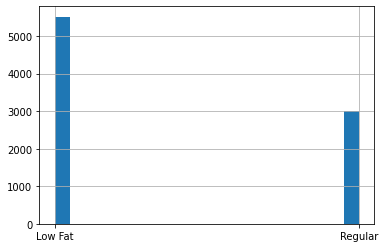

In [148]:
df['Item_Fat_Content'].hist(bins=20)

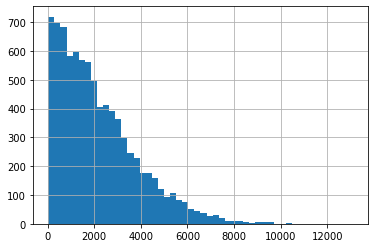

In [150]:
df['Item_Outlet_Sales'].hist(bins=50)

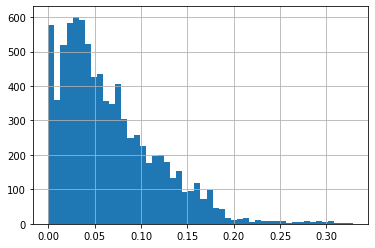

In [152]:
df['Item_Visibility'].hist(bins=50)

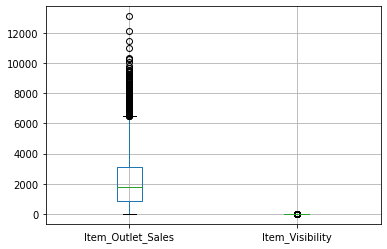

In [135]:
df.boxplot(column=['Item_Outlet_Sales', 'Item_Visibility'])

Finding out if healthier options are more desirable for consumers than regular options.

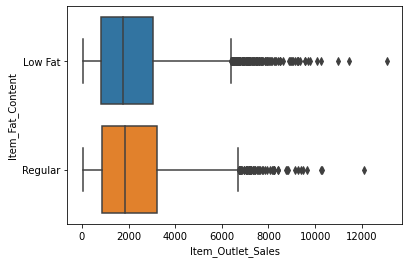

In [136]:
sns.boxplot(x='Item_Outlet_Sales', y='Item_Fat_Content', data=df)

This plot helps me assume that consumers aren't as aware of healthier options as they are regular options.

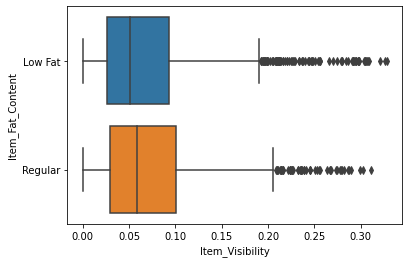

In [141]:
sns.boxplot(x='Item_Visibility', y='Item_Fat_Content', data=df)

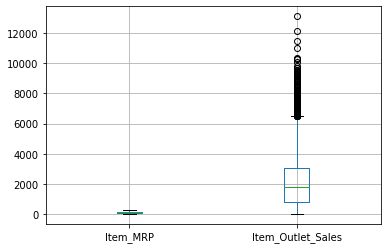

In [157]:
df.boxplot(column = ['Item_MRP', 'Item_Outlet_Sales'])

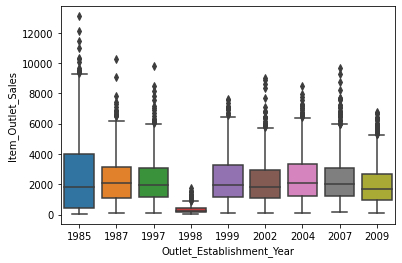

In [158]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)

Comparing the types of stores with the Sales numbers to see where consumer's spend the most money.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

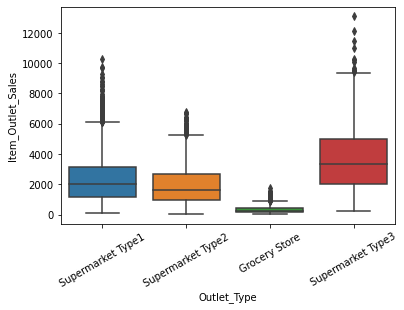

In [160]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 30)

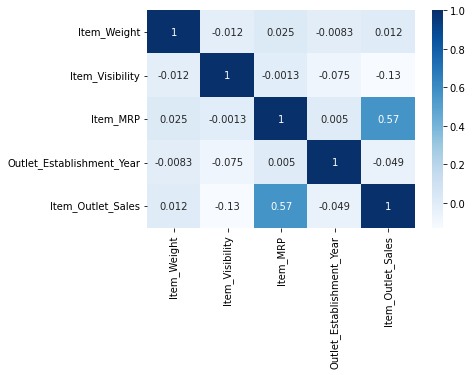

In [138]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot = True)